# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/colabnotebooks/personal_loan/Loan_Modelling.csv')

loan = df.copy()


## Data Overview

* Observations
* Sanity checks

In [ ]:
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
loan.shape

(5000, 14)

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# **Negative values in 'Expereince' need to be addressed. In order for Zip code to be valuable, need to reclassify as a categorical variable. All other variables seem to be functioning in a logicl manner. Personal_Loan, Securities_Account, Mortgage, CreditCard, and CD_Account observations seem to be dominated by zero values. Needs additional exploration.**

In [ ]:
loan.duplicated().sum()

0

# **No duplicate rows**

In [ ]:
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

# **No missing values**

# **Fixing negative values in 'Experience'**

In [ ]:
loan["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# Count how many values are negative in the 'experience' column
negative_experience_count = (loan['Experience'] < 0).sum()
print(f"Number of negative values in 'experience': {negative_experience_count}")

Number of negative values in 'experience': 52


In [ ]:
#replacing negative values with their corresponding positive values
loan['Experience'] = loan['Experience'].abs()

In [ ]:
# Confirming negative values are gone
negative_experience_count = (loan['Experience'] < 0).sum()
print(f"Number of negative values in 'experience': {negative_experience_count}")

Number of negative values in 'experience': 0


In [ ]:
loan["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

# **Dropping ID column as it has no bearing on the model objective**

In [ ]:
#Dropping ID column
loan.drop('ID', axis=1, inplace=True)

In [ ]:
# Changing 'Education' to a categorical column
education_levels = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}

# Map the 'Education' column to the new labels
loan['Education'] = loan['Education'].map(education_levels)

# Convert 'Education' to a categorical type with the specified order
loan['Education'] = pd.Categorical(
    loan['Education'],
    categories=['Undergrad', 'Graduate', 'Advanced/Professional'],
    ordered=True
)

# Check the changes
print(loan['Education'].head())

0    Undergrad
1    Undergrad
2    Undergrad
3     Graduate
4     Graduate
Name: Education, dtype: category
Categories (3, object): ['Undergrad' < 'Graduate' < 'Advanced/Professional']


In [ ]:
# unique zip codes
loan["ZIPCode"].nunique()

467

In [ ]:
loan["ZIPCode"] = loan["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    loan["ZIPCode"].str[0:2].nunique(),
)
loan["ZIPCode"] = loan["ZIPCode"].str[0:2]

loan["ZIPCode"] = loan["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
cat_cols = ["Personal_Loan","Securities_Account","CD_Account","Online","CreditCard","ZIPCode",
]
loan[cat_cols] = loan[cat_cols].astype('category')

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

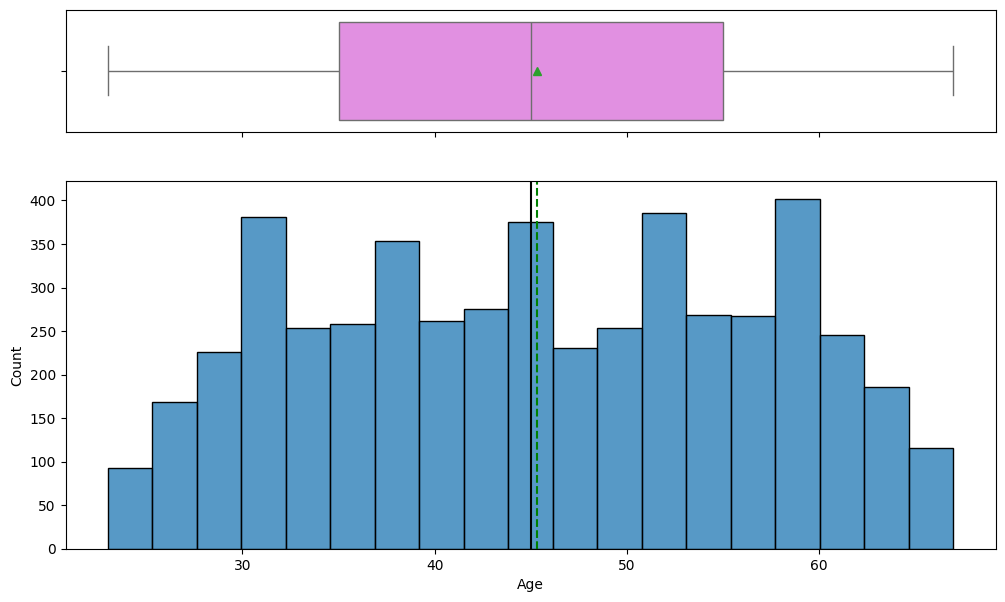

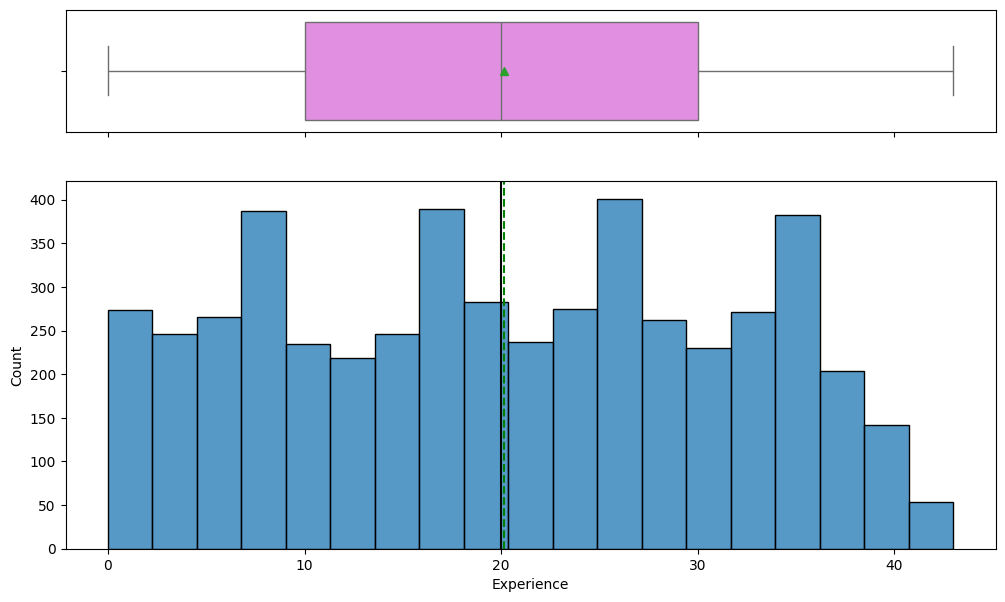

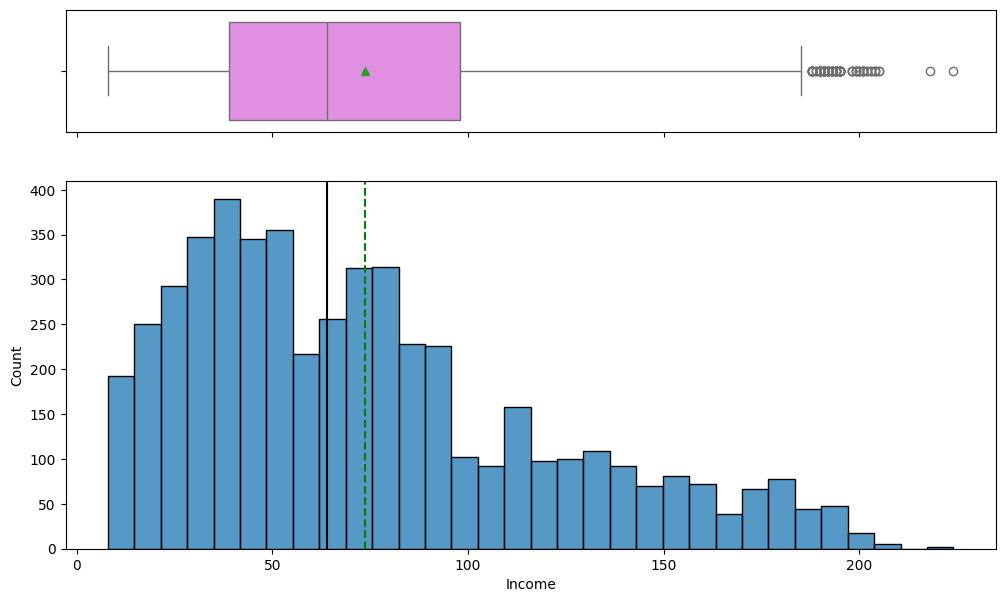

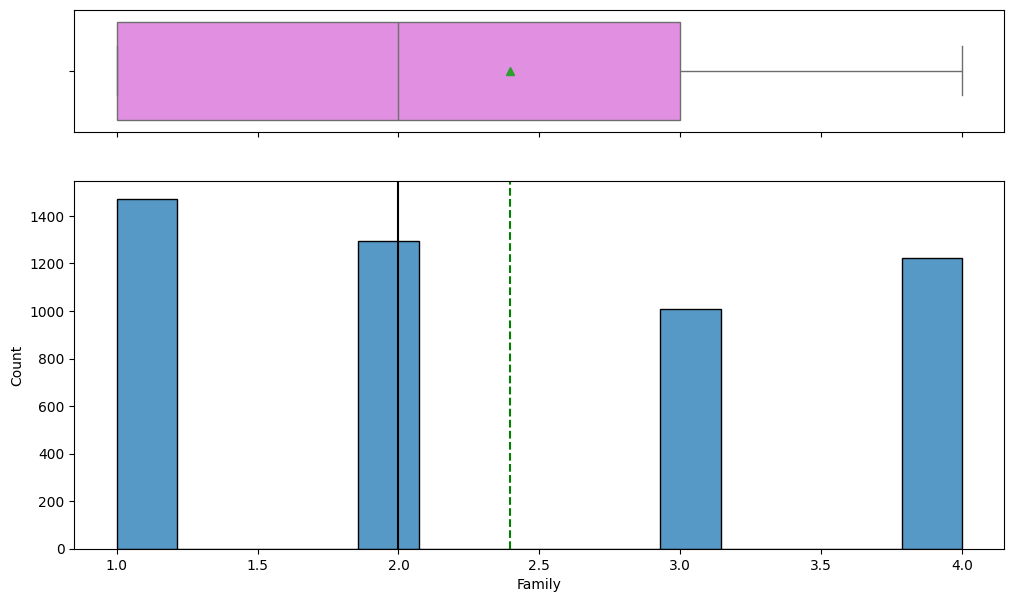

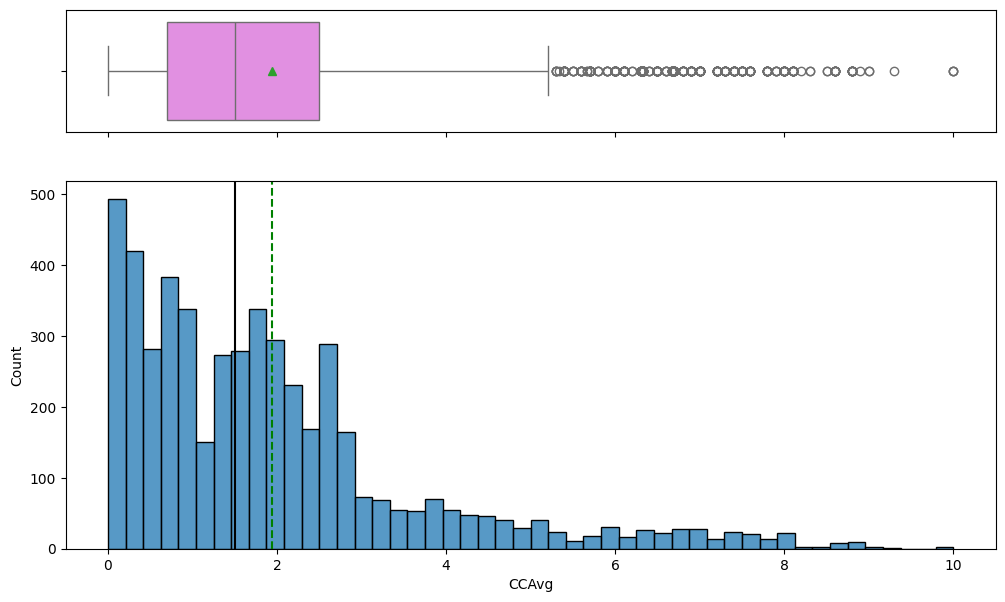

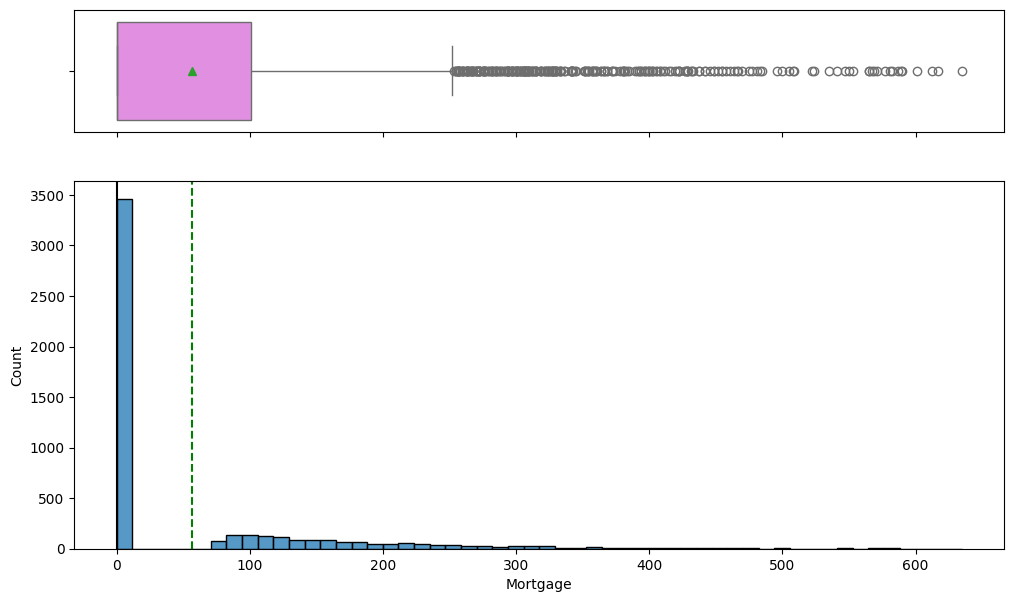

In [ ]:
# selecting numerical columns
num_col = loan.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(loan, item)

# **High number of outliers in Mortgage with a heay right skew. Most of the population have a 0 mortgage blance with the bank. CC_Avg also has a high number of outliers and is right skewed. **

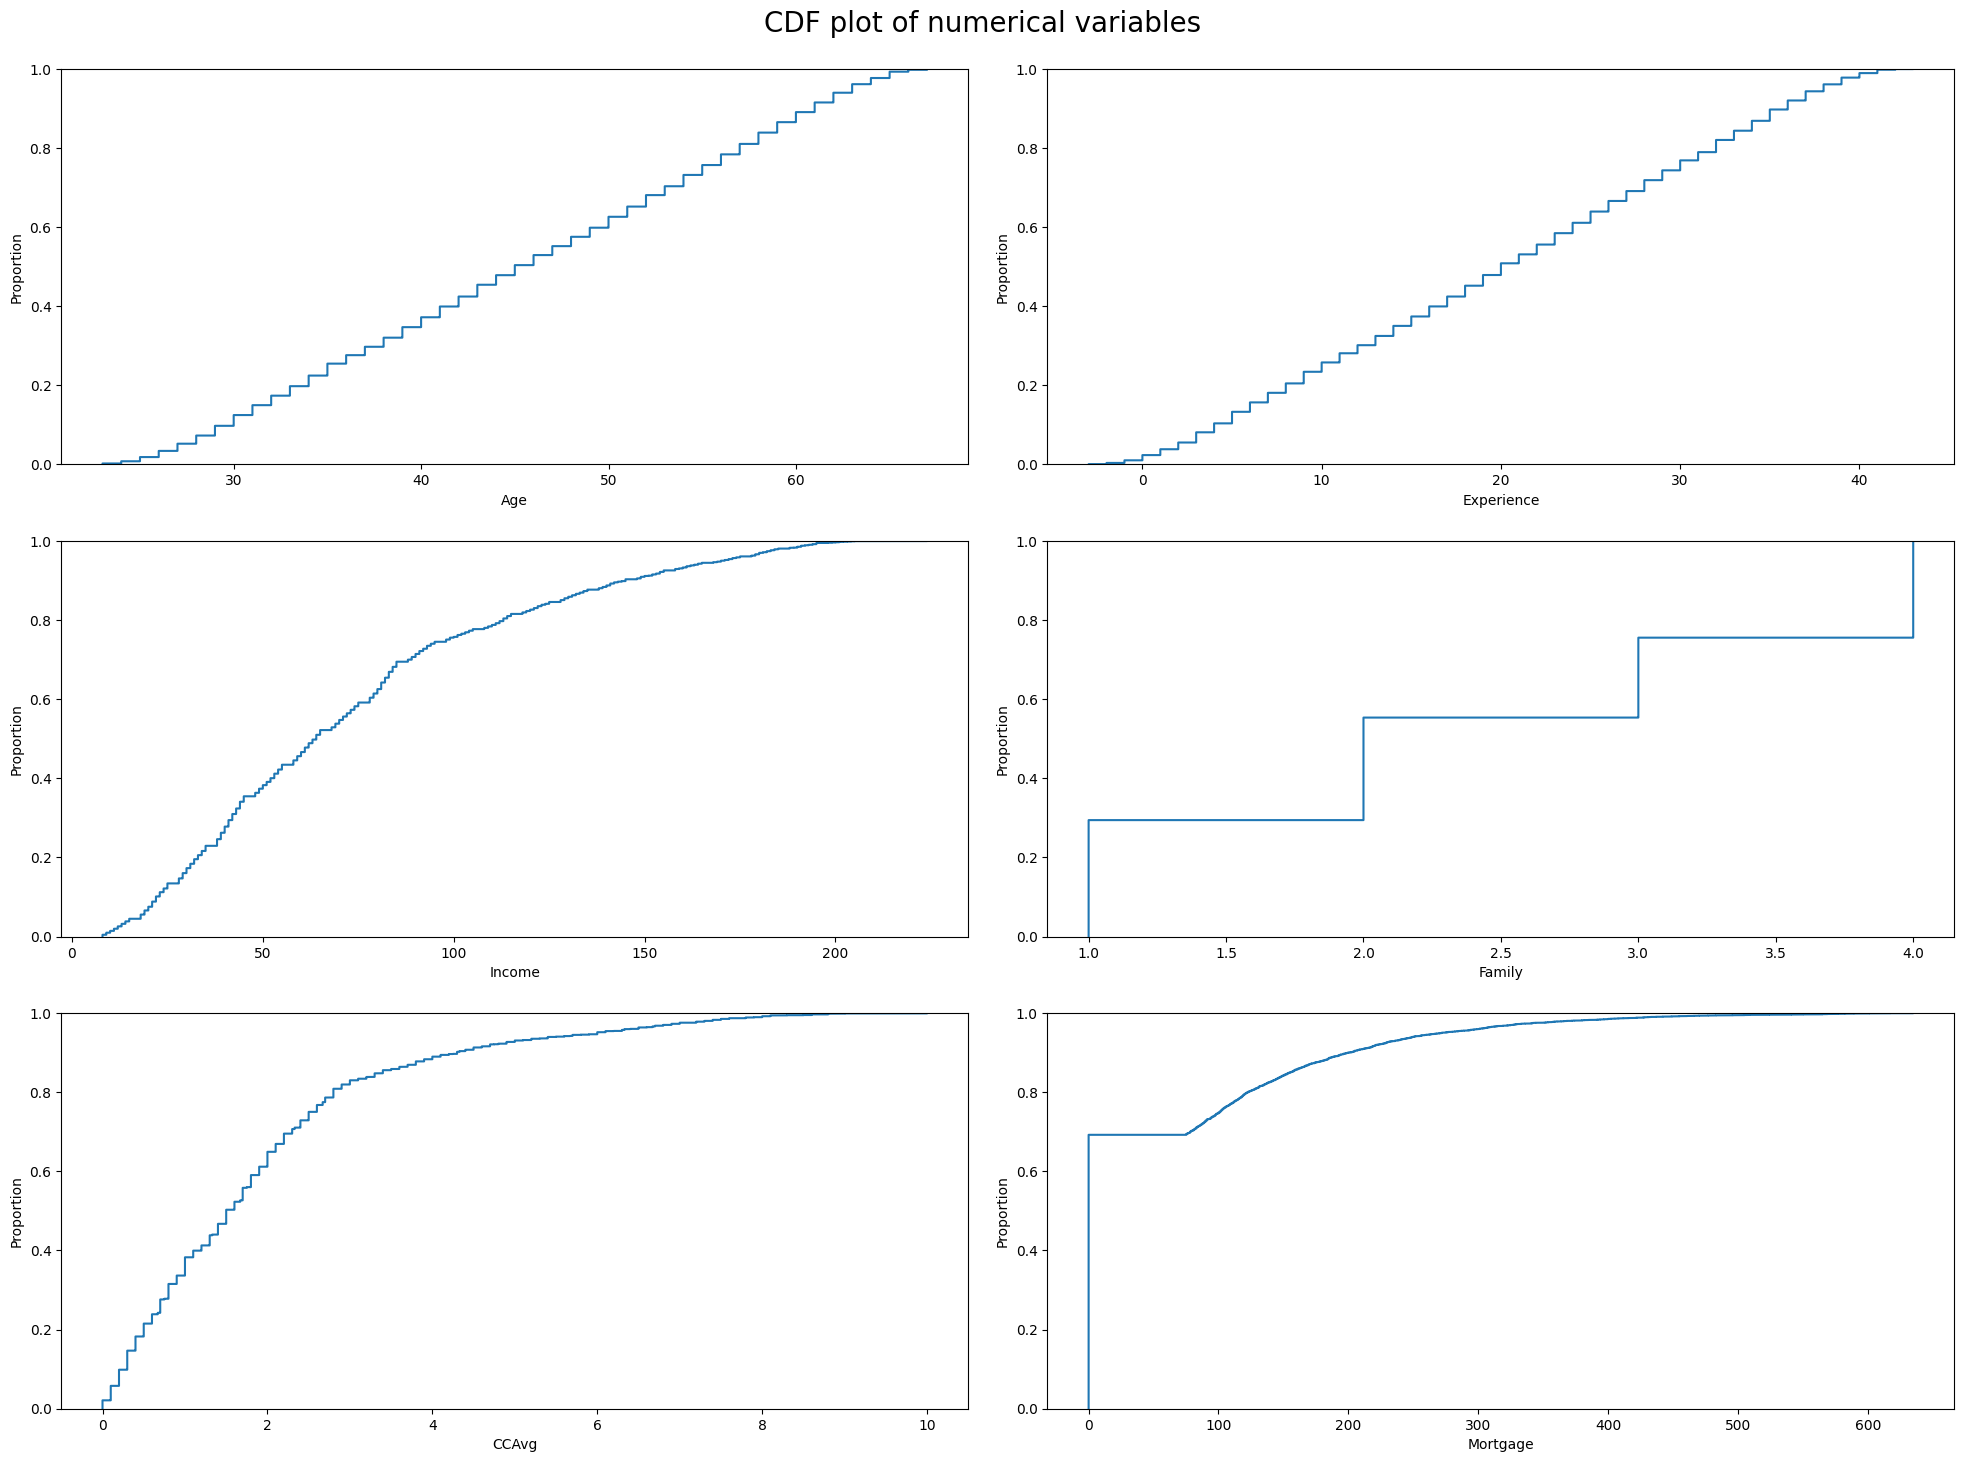

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(2):
        if counter < len(num_col):  # Check to ensure the counter is within the number of columns
            sns.ecdfplot(ax=axes[ii][jj], x=df[num_col[counter]])
            counter += 1
    else:
        pass

fig.tight_layout(pad=2.0)

# **High number of outliers Mortgage. Age and Experience have nearly the same CDF shape**

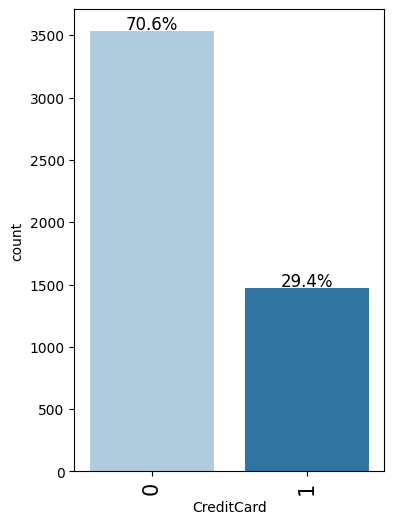

In [ ]:
labeled_barplot(loan, "CreditCard", perc=True)

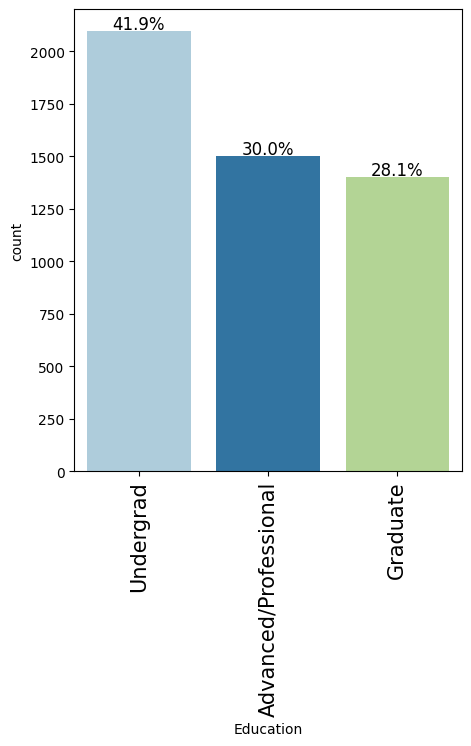

In [ ]:
labeled_barplot(loan, "Education", perc=True)

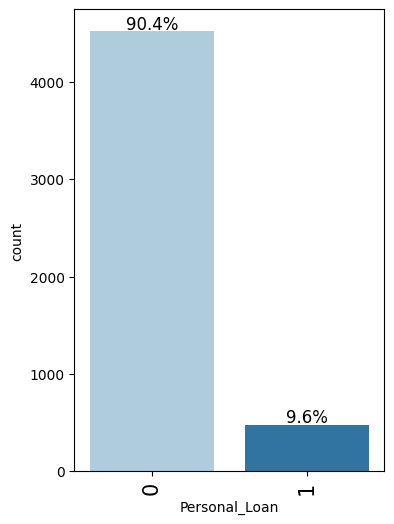

In [ ]:
labeled_barplot(loan, "Personal_Loan", perc=True)

# **Less than 10% have a personal loan. Will need to account for this when developing criteria for the decision tree model**

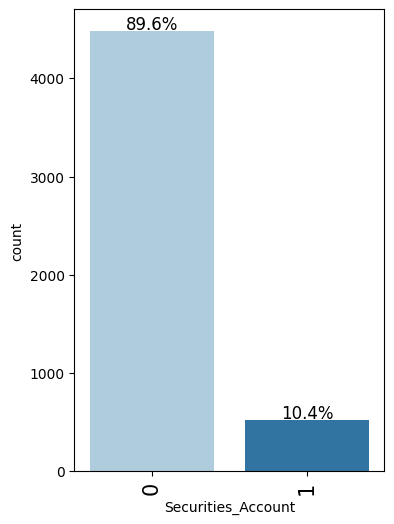

In [ ]:
labeled_barplot(loan, "Securities_Account", perc=True)

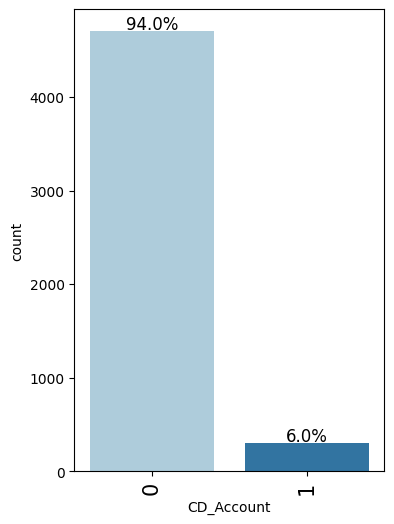

In [ ]:
labeled_barplot(loan, "CD_Account", perc=True)

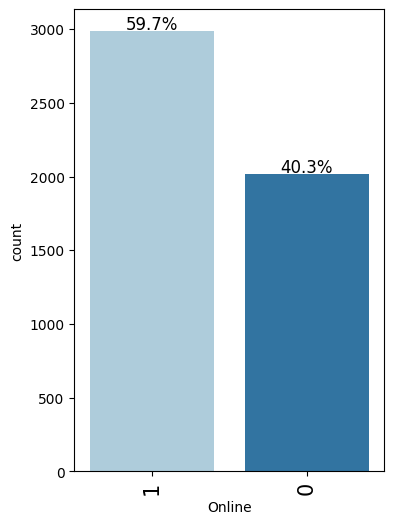

In [ ]:
labeled_barplot(loan, "Online", perc=True)

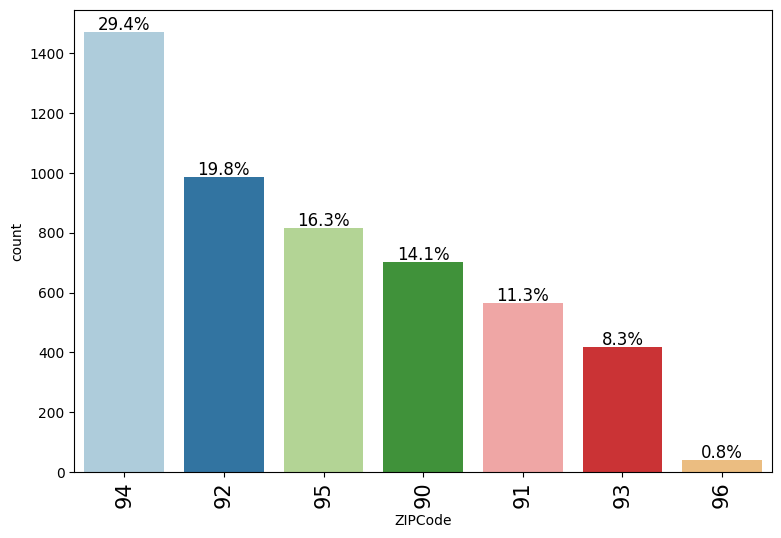

In [ ]:
labeled_barplot(loan, "ZIPCode", perc=True)

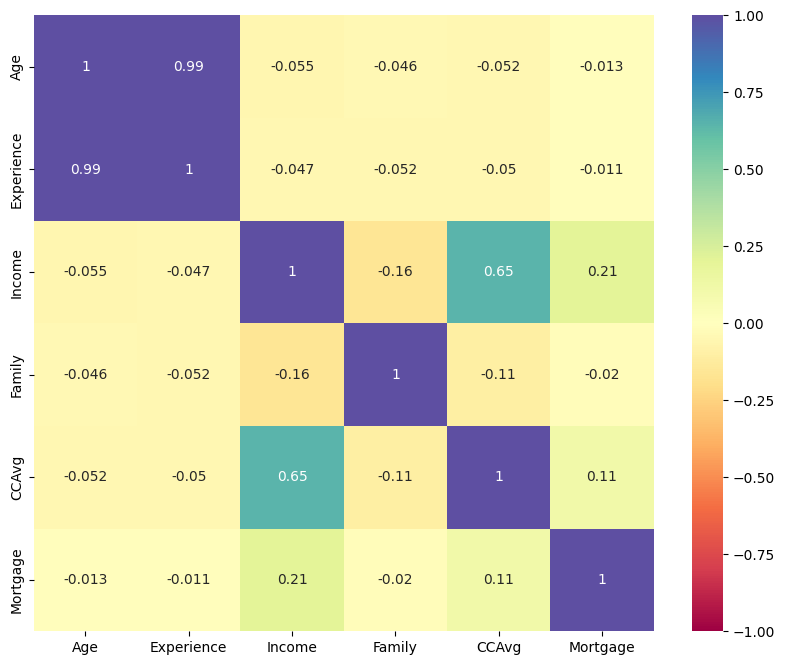

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(loan.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

# **Age and Experience are too correlated to be used in the same model. I plan on dropping Experience to keep Age for now.  **

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


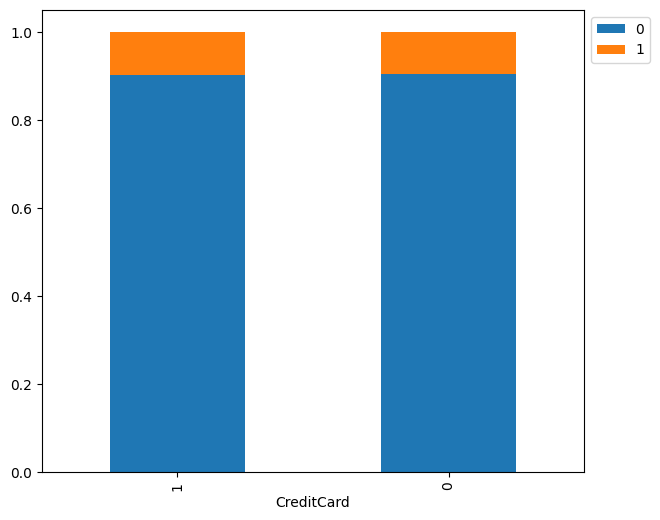

In [ ]:
stacked_barplot(loan, "CreditCard", "Personal_Loan")

Personal_Loan             0    1   All
Education                             
All                    4520  480  5000
Advanced/Professional  1296  205  1501
Graduate               1221  182  1403
Undergrad              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


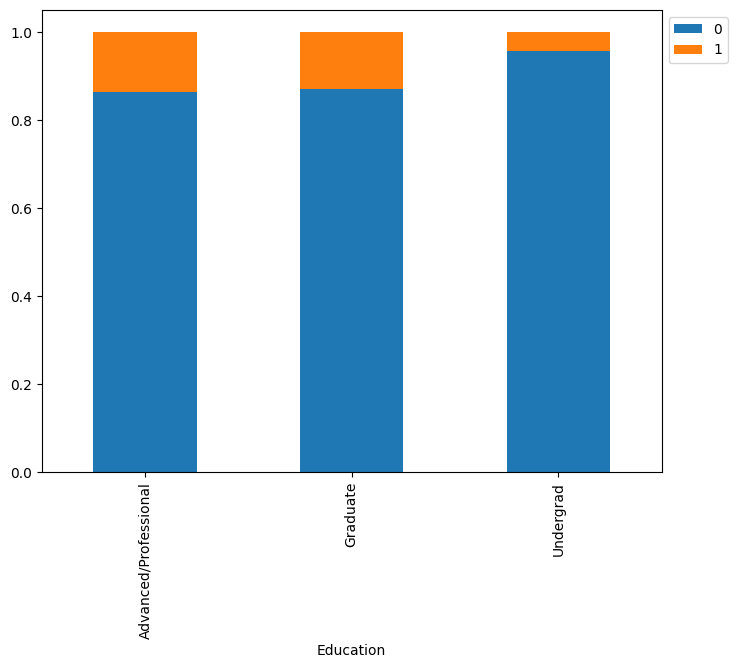

In [ ]:
stacked_barplot(loan, "Education", "Personal_Loan")

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


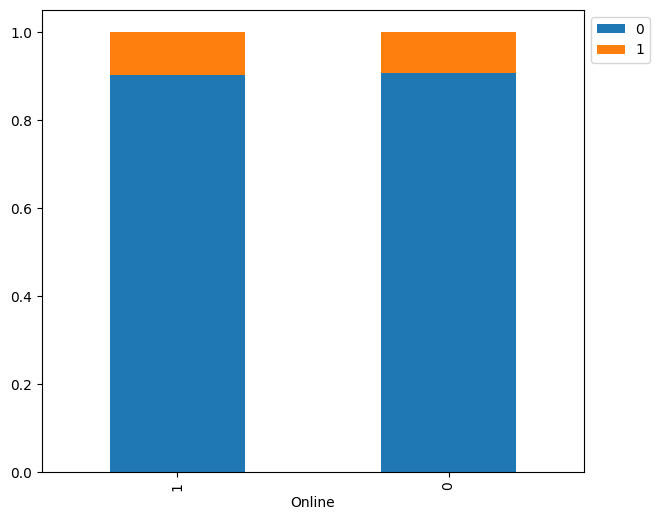

In [ ]:
stacked_barplot(loan, "Online", "Personal_Loan")

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


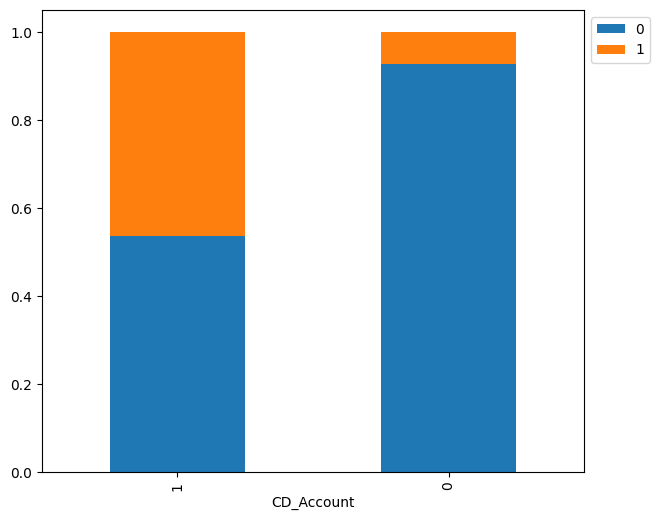

In [ ]:
stacked_barplot(loan, "CD_Account", "Personal_Loan")

# **It appears that thos who have a CD_Account are morelikely to have a persnal loan as well**

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


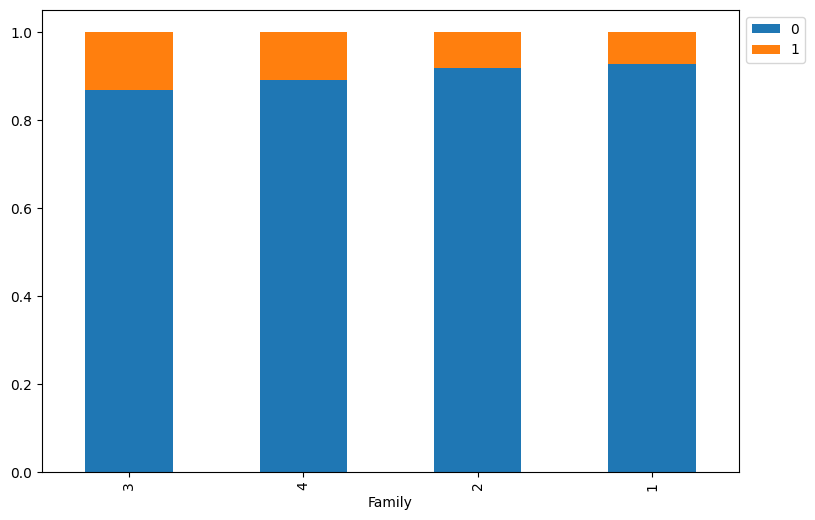

In [ ]:
stacked_barplot(loan, "Family", "Personal_Loan")

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


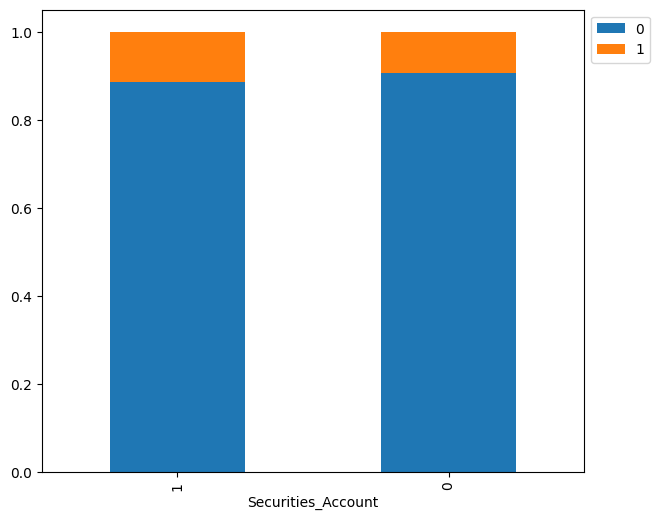

In [ ]:
stacked_barplot(loan, "Securities_Account", "Personal_Loan")

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


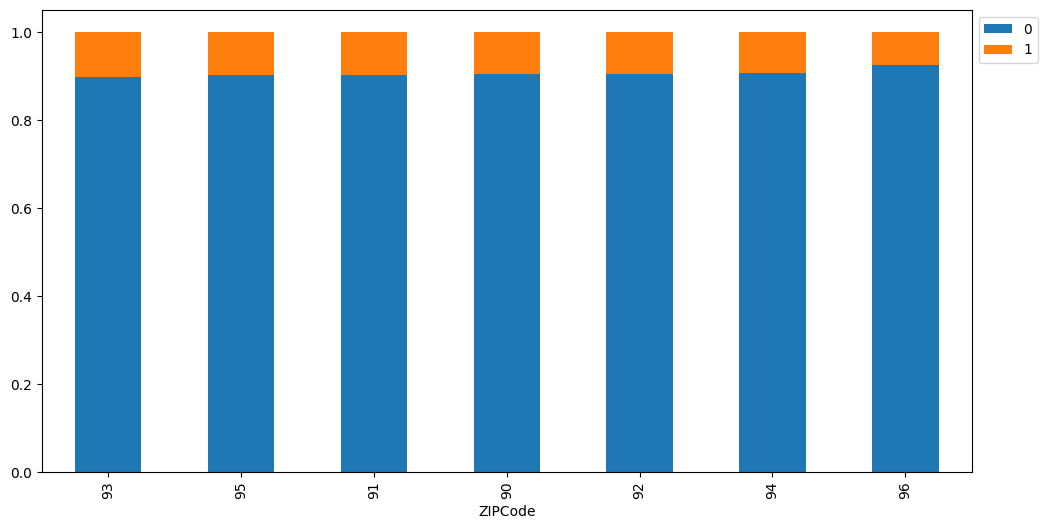

In [ ]:
stacked_barplot(loan, "ZIPCode", "Personal_Loan")

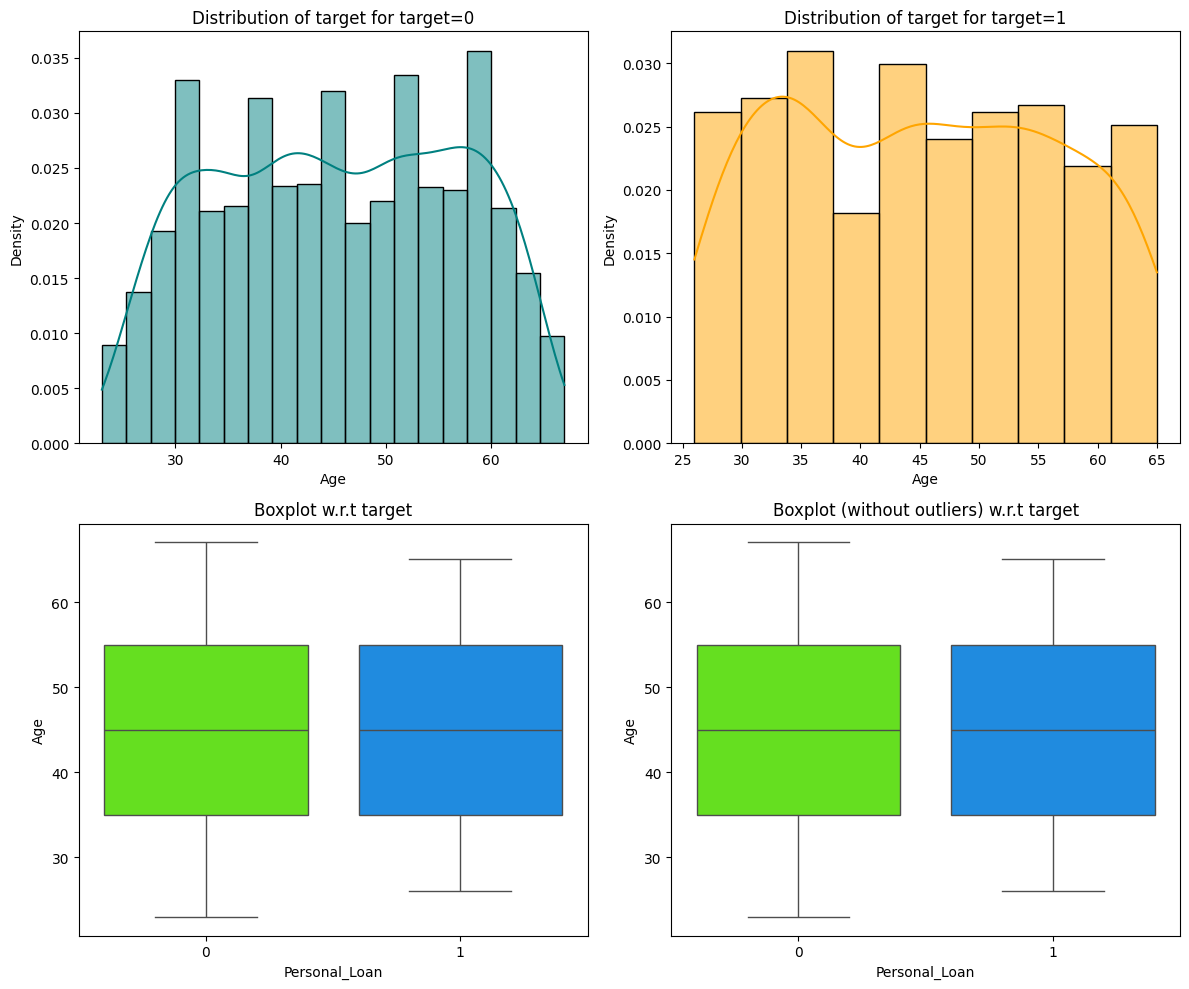

In [ ]:
distribution_plot_wrt_target(loan, "Age", "Personal_Loan")

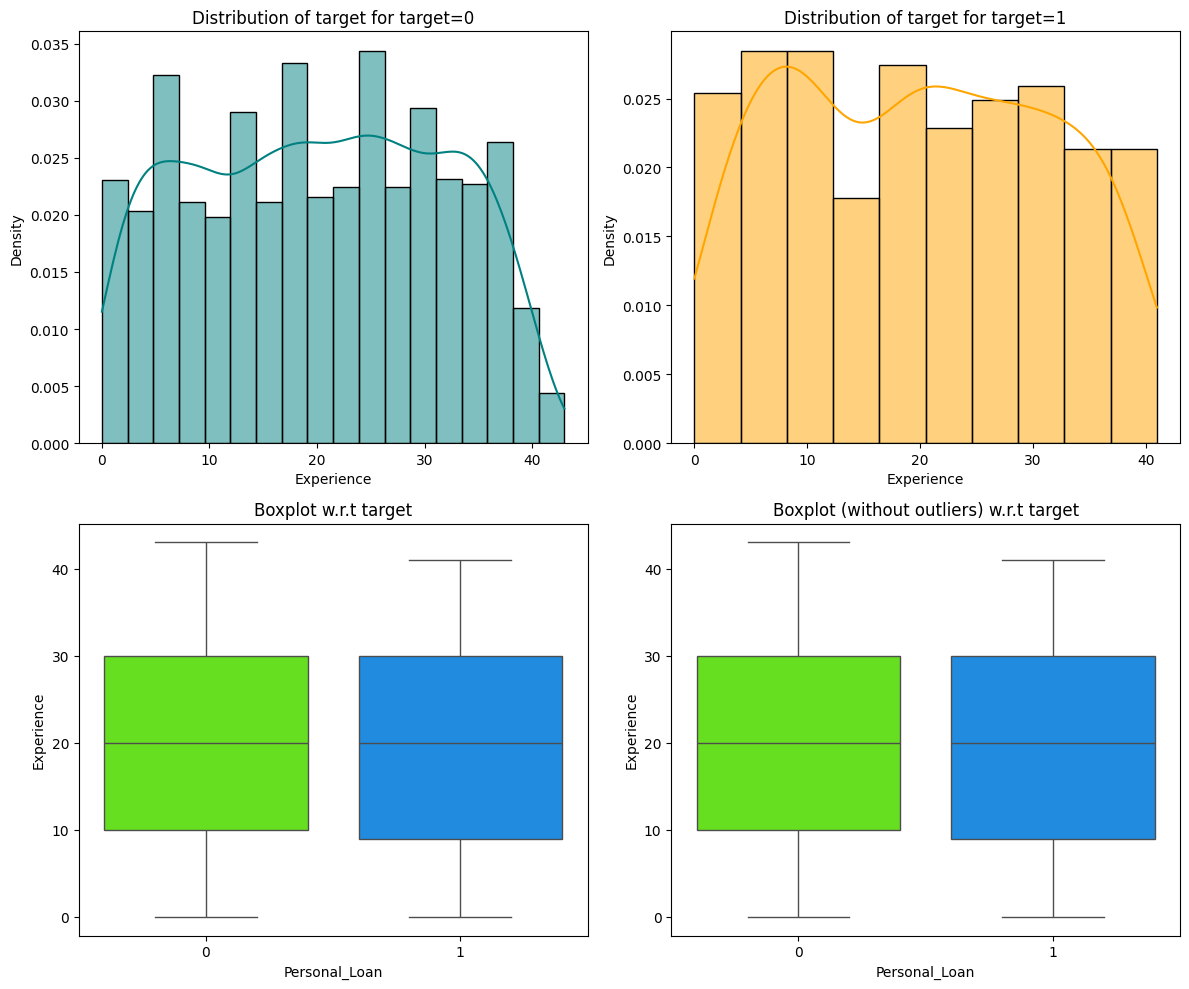

In [ ]:
distribution_plot_wrt_target(loan, "Experience", "Personal_Loan")

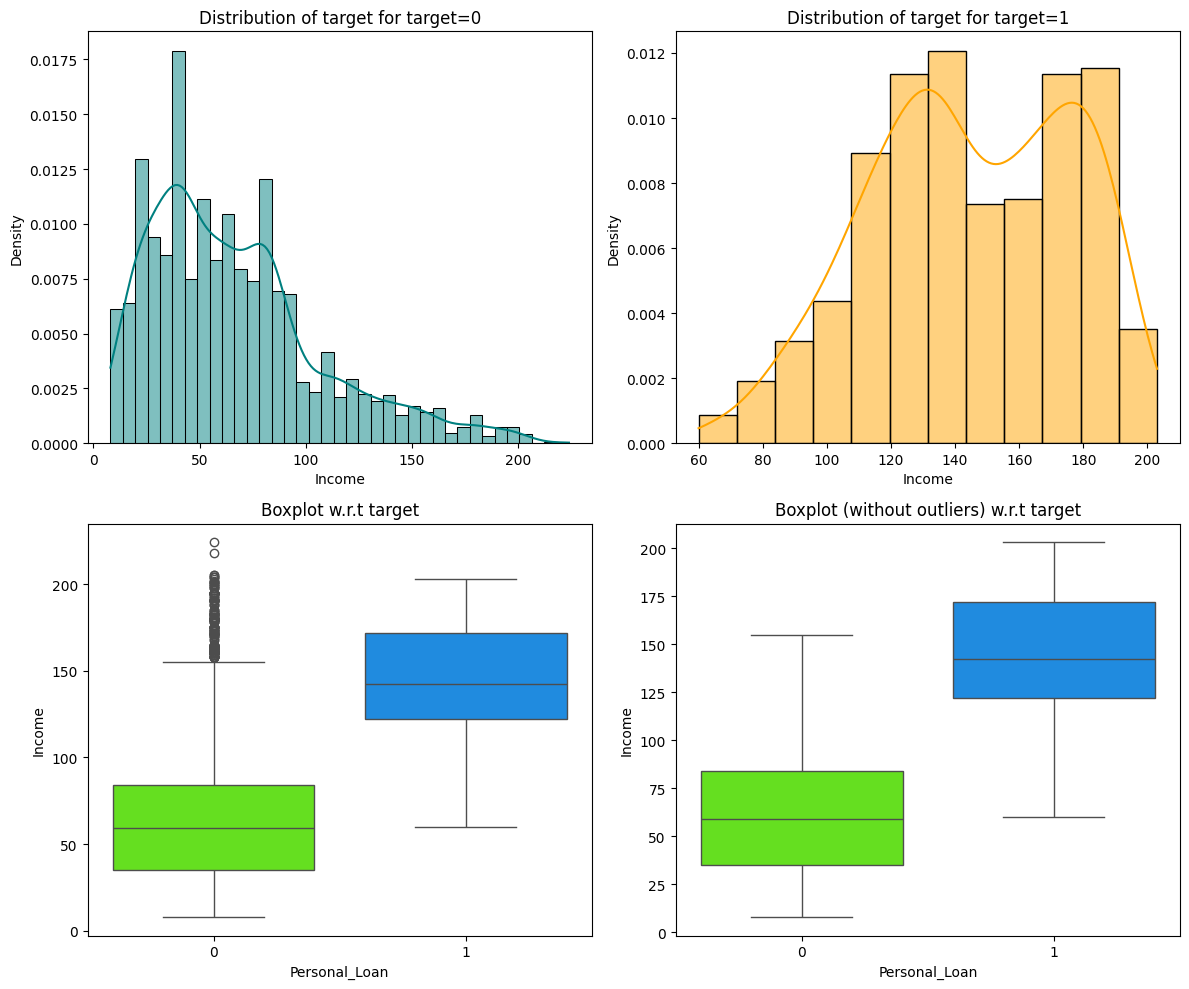

In [ ]:
distribution_plot_wrt_target(loan, "Income", "Personal_Loan")

# **Thos with a personal loan have a higher median income than those who do not have personal loans.**

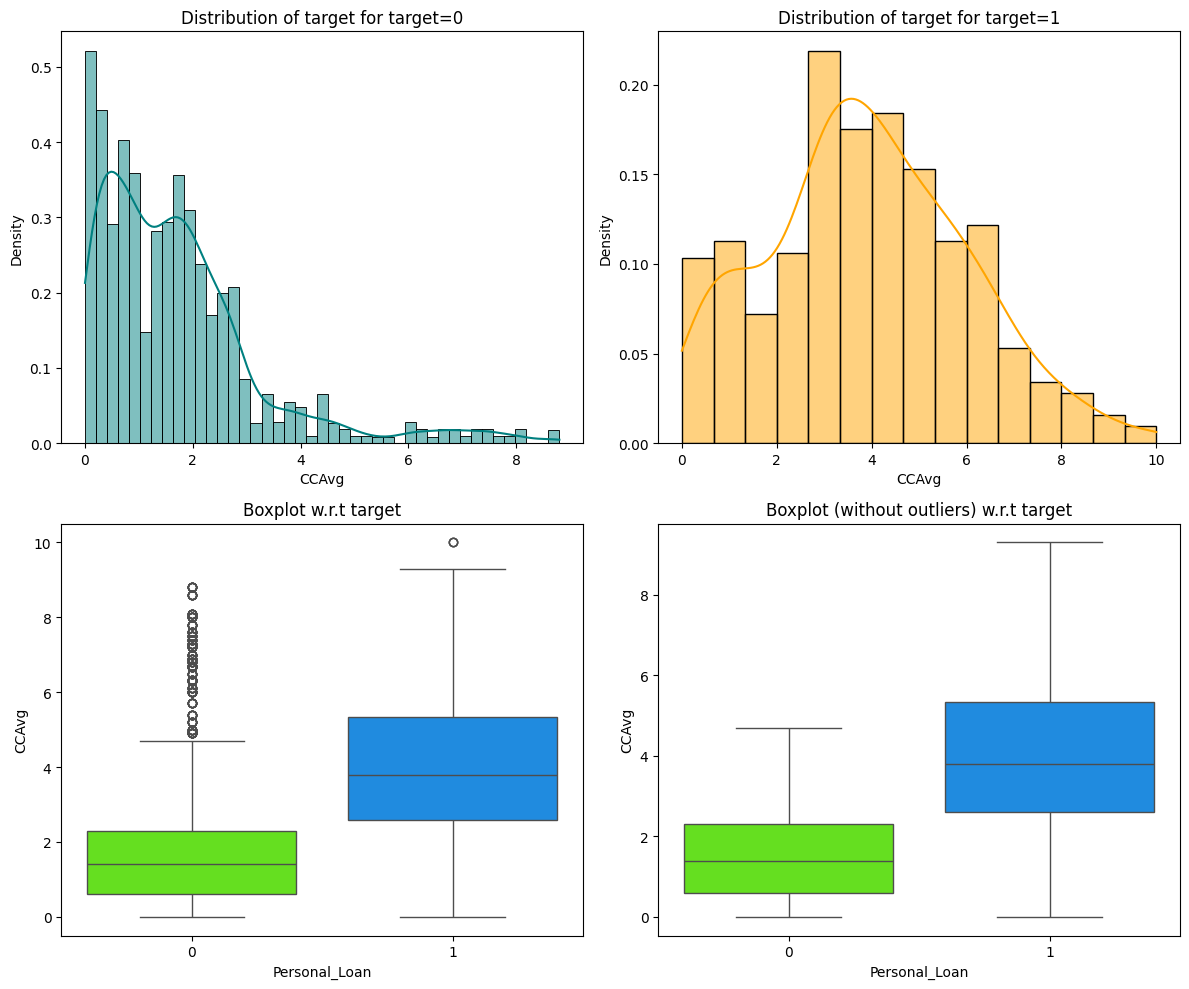

In [ ]:
distribution_plot_wrt_target(loan, "CCAvg", "Personal_Loan")

# **Those with a personal loan also tento have a higher CC_Avg than those who do not have a personal loan**

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
X = loan.drop(["Personal_Loan","Experience",], axis=1)
y = loan["Personal_Loan"]

In [ ]:
X = pd.get_dummies(X, columns=["Education","ZIPCode"], drop_first=True)
X.head()

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96
0,25,49,4,1.6,0,1,0,0,0,0,0,1,0,0,0,0,0
1,45,34,3,1.5,0,1,0,0,0,0,0,0,0,0,0,0,0
2,39,11,1,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,35,100,1,2.7,0,0,0,0,0,1,0,0,0,0,1,0,0
4,35,45,4,1.0,0,0,0,0,1,1,0,1,0,0,0,0,0


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions by:**
Predicting a customer will not sign up for a personal loan but in reality the customer would be interested in a personal loan.

Predicting a customer will be interested in a personal loan but in reality the customer is not interested in a personal loan.

**Which case is more important?**
In order to ensure the bank has the highest chance to capture ALL likely to be interested in a personal loan, it will accept marketing to those who may not end up not being interested

**How to reduce this loss i.e need to reduce False Negatives?**
recall should be maximized, the greater the recall higher the chances of maximizing true positive observations

### Model Building

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1, class_weight= 'balanced')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

# **Given less than 10% of the population actually signed up for a personal loan, I added the class_weight = balanced control on the model so the negative respondents do not overpower the model**

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3000
Number of rows in test data = 2000


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.904333
1    0.095667
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.9035
1    0.0965
Name: Personal_Loan, dtype: float64


In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


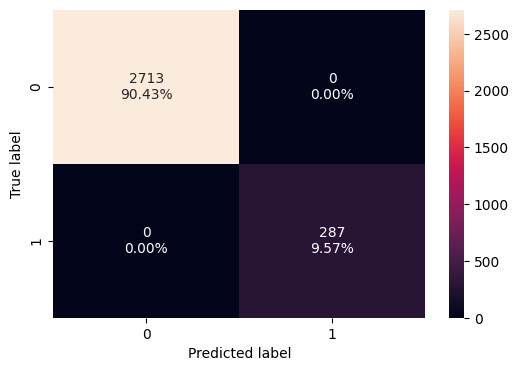

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.9775,0.849741,0.911111,0.879357


## **The difference between train and test recall suggests overfitting of the model. As we are maximizing recall it is unlikely that this model will be utilized as is**

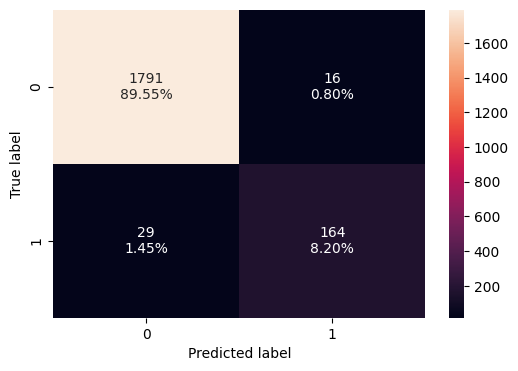

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_Graduate', 'Education_Advanced/Professional', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96']


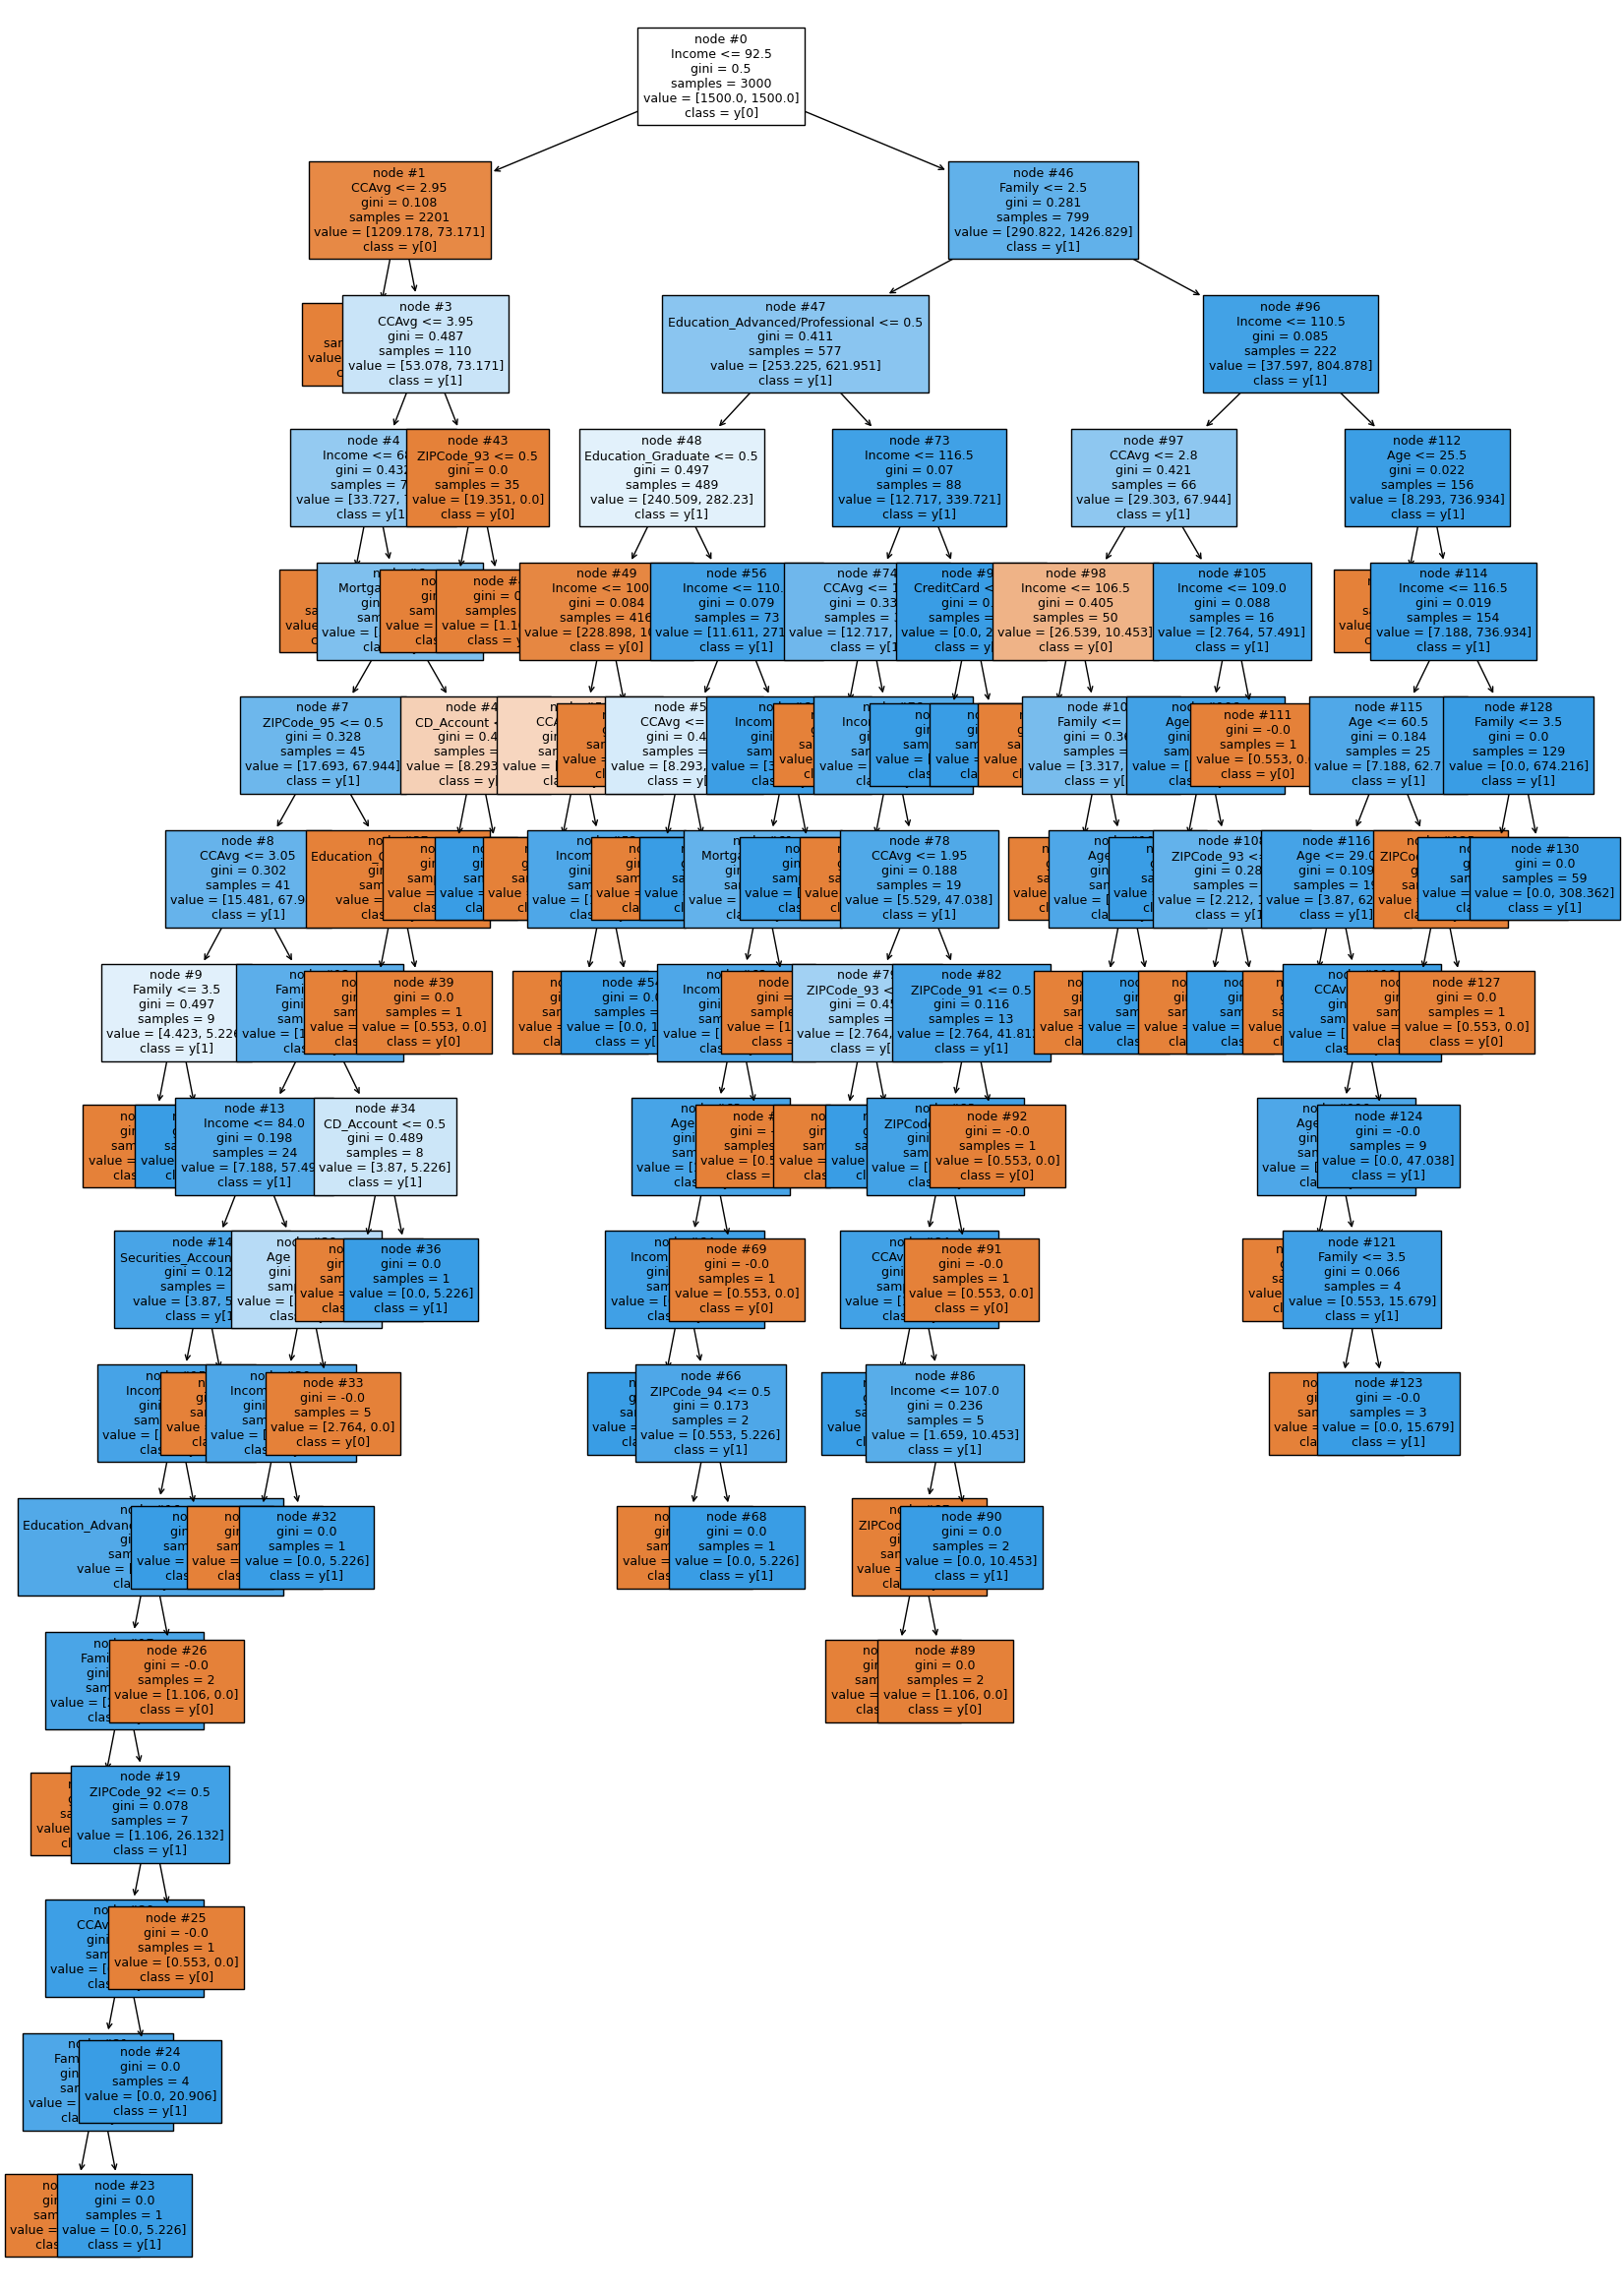

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

# **Very complex tree design by utilizing an unconstrained model. Not ideal for implementaiton or insight generation**

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1156.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 3.95
|   |   |   |--- Income <= 68.50
|   |   |   |   |--- weights: [7.74, 0.00] class: 0
|   |   |   |--- Income >  68.50
|   |   |   |   |--- Mortgage <= 104.50
|   |   |   |   |   |--- ZIPCode_95 <= 0.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- weights: [4.42, 0.00] class: 0
|   |   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 5.23] class: 1
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                          Imp
Income                           6.295520e-01
Education_Graduate               1.449609e-01
CCAvg                            9.542105e-02
Education_Advanced/Professional  5.166842e-02
Family                           4.322710e-02
Age                              1.361863e-02
CD_Account                       7.239568e-03
ZIPCode_93                       5.518073e-03
Mortgage                         4.227422e-03
ZIPCode_95                       1.905405e-03
ZIPCode_92                       6.926098e-04
ZIPCode_94                       6.666667e-04
ZIPCode_91                       6.567362e-04
Securities_Account               6.454004e-04
CreditCard                       6.498866e-17
Online                           0.000000e+00
ZIPCode_96                       0.000000e+00


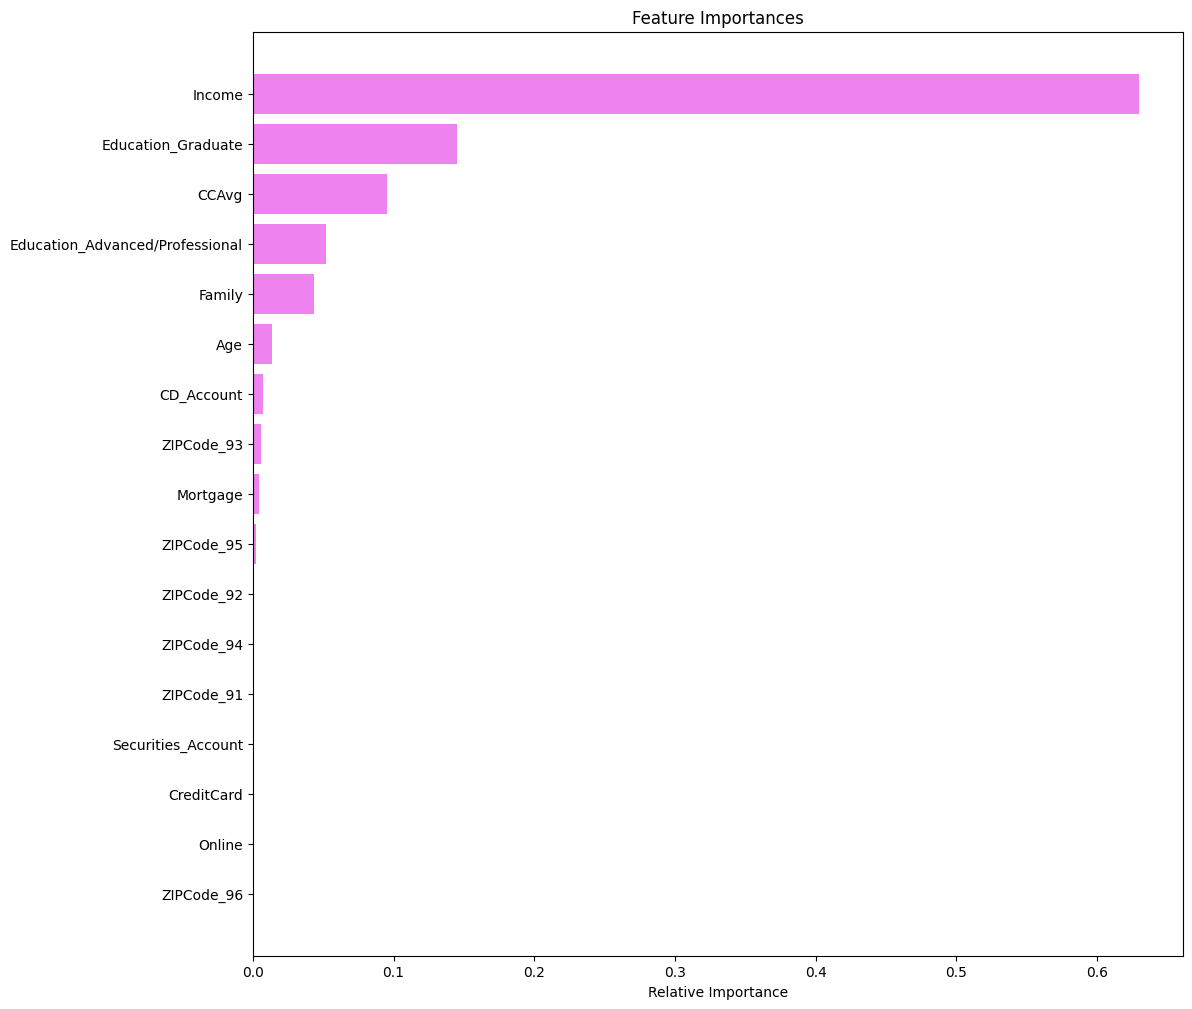

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# **Income Education_graduate and CC_Avg are the most important variables in this model**

### Model Performance Improvement

# **Pre-pruning using grid search to improve the previous unconstrained and over-fitted model **

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    'class_weight': [None, 'balanced'],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=10,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=1)

Model takes ~ 15min to run , but covers a wide range of possible parameters to find the best improvement to the first model. Good to see that 'balanced wieght' was also chosen in the best model.

I like this model for its simplicity and high recall. As mentioned prior, the most important aspect of this model is capturing ALL who may be a good fit for a personal loan which is why the model is optimizing for recall. False positives are accepted to ensure the true population of those interested in a personal loan are accounted for.

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.804333,1.0,0.328375,0.494401


# **Training model shows perfect recall but awful precision. If the test results come back similar, I still believe this will be acceptable to the business. **

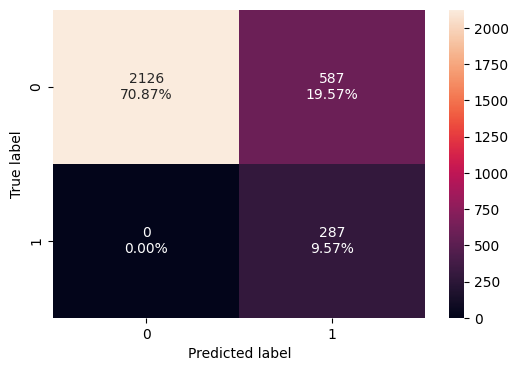

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.785,0.989637,0.308562,0.470443


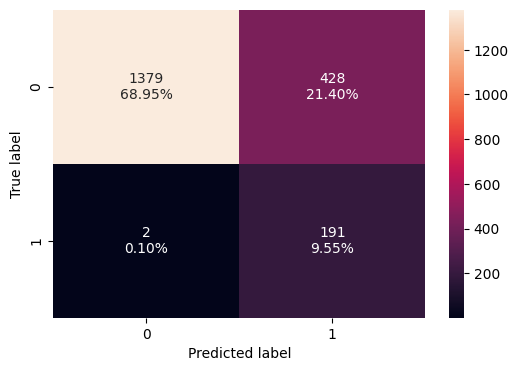

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

# **Almost 99% recall suggesting that the model is doing a good job of capturing all who may be interested in a personal loan. However the model does have a high % of false positives which impact the precision & accuracy of the model. This is still an acceptable outcome by the business. **

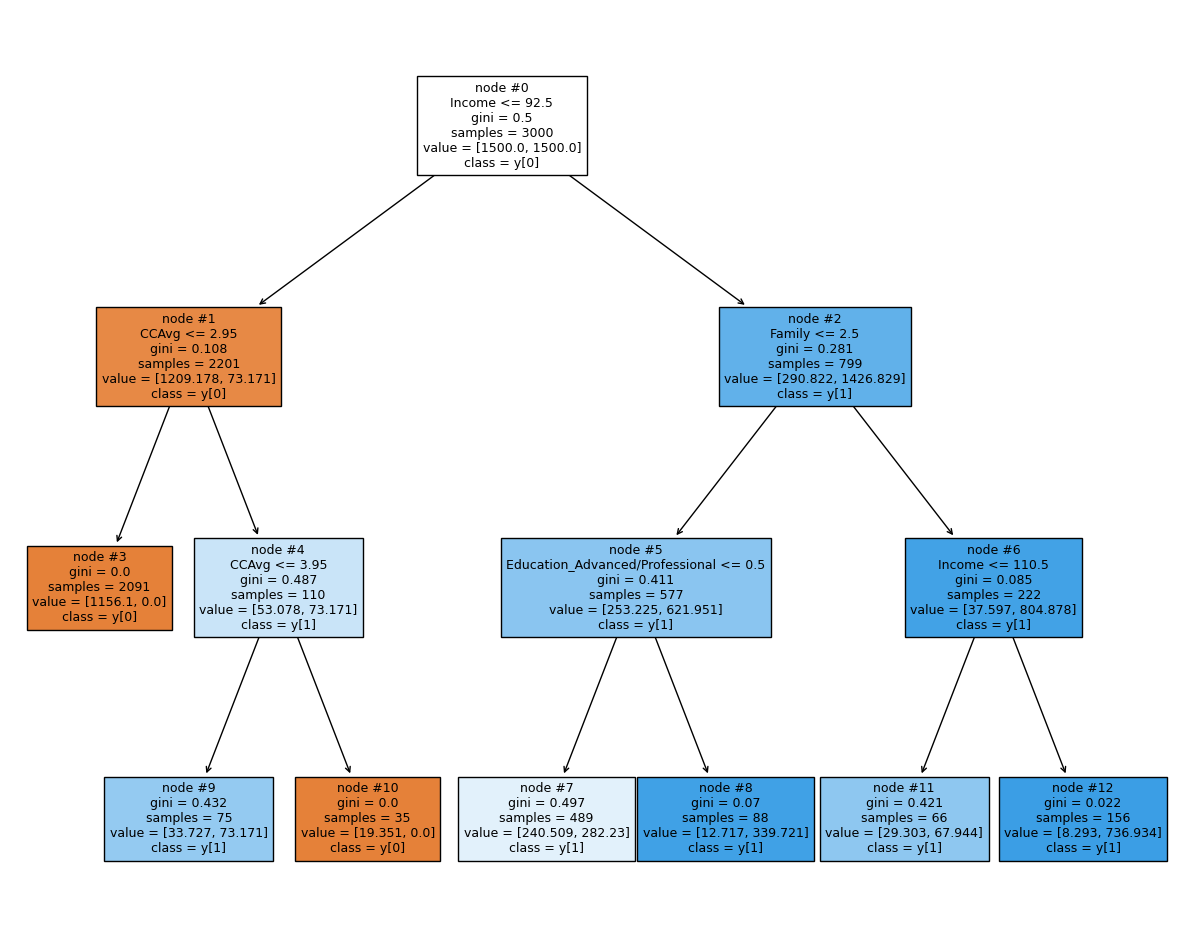

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

# **Much simpler design of the tree b yutilizing the pre-pruning criteria**

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1156.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 3.95
|   |   |   |--- weights: [33.73, 73.17] class: 1
|   |   |--- CCAvg >  3.95
|   |   |   |--- weights: [19.35, 0.00] class: 0
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_Advanced/Professional <= 0.50
|   |   |   |--- weights: [240.51, 282.23] class: 1
|   |   |--- Education_Advanced/Professional >  0.50
|   |   |   |--- weights: [12.72, 339.72] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 110.50
|   |   |   |--- weights: [29.30, 67.94] class: 1
|   |   |--- Income >  110.50
|   |   |   |--- weights: [8.29, 736.93] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                      Imp
Income                           0.803170
CCAvg                            0.082553
Education_Advanced/Professional  0.068054
Family                           0.046224
Age                              0.000000
ZIPCode_95                       0.000000
ZIPCode_94                       0.000000
ZIPCode_93                       0.000000
ZIPCode_92                       0.000000
ZIPCode_91                       0.000000
CreditCard                       0.000000
Education_Graduate               0.000000
Online                           0.000000
CD_Account                       0.000000
Securities_Account               0.000000
Mortgage                         0.000000
ZIPCode_96                       0.000000


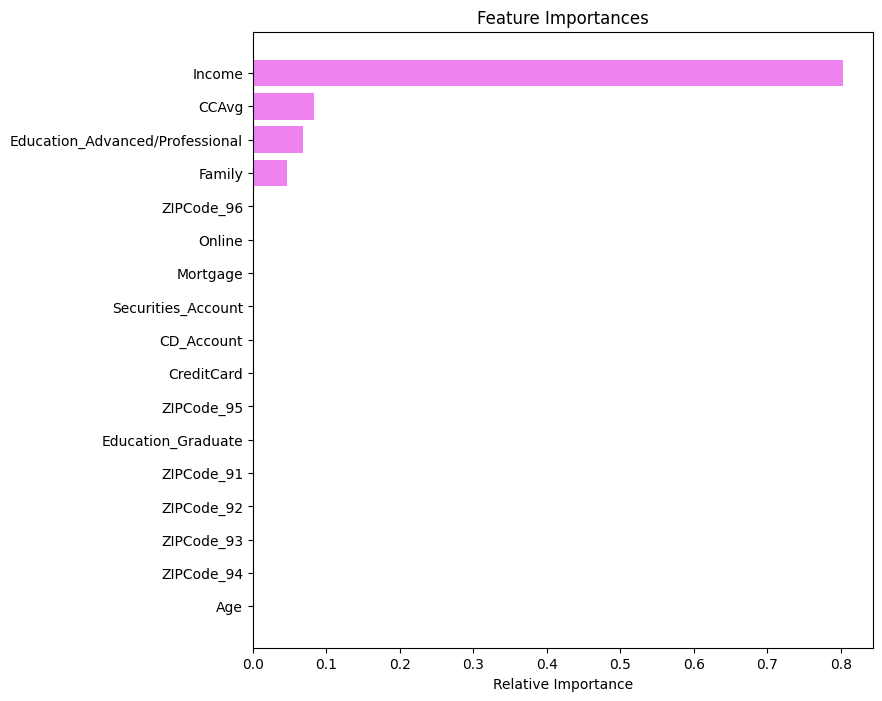

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# **Number of important variables is refined down to four (Income, CCAvg, Advanced Education, and Family). Zip code, Mortgage, and CD_Account, not important to the recall of this model**


# **Cost Complexity Pruning to see if the model can be refined any more**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight='balanced')
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-6.714614e-17
1,3.683010e-19,-6.677784e-17
2,1.784214e-17,-4.893570e-17
3,2.123869e-17,-2.769701e-17
4,3.249433e-17,4.797324e-18
5,7.485302e-17,7.965034e-17
6,1.654286e-16,2.450789e-16
7,1.780204e-04,3.560408e-04
8,1.804794e-04,7.169995e-04
9,3.219796e-04,1.360959e-03


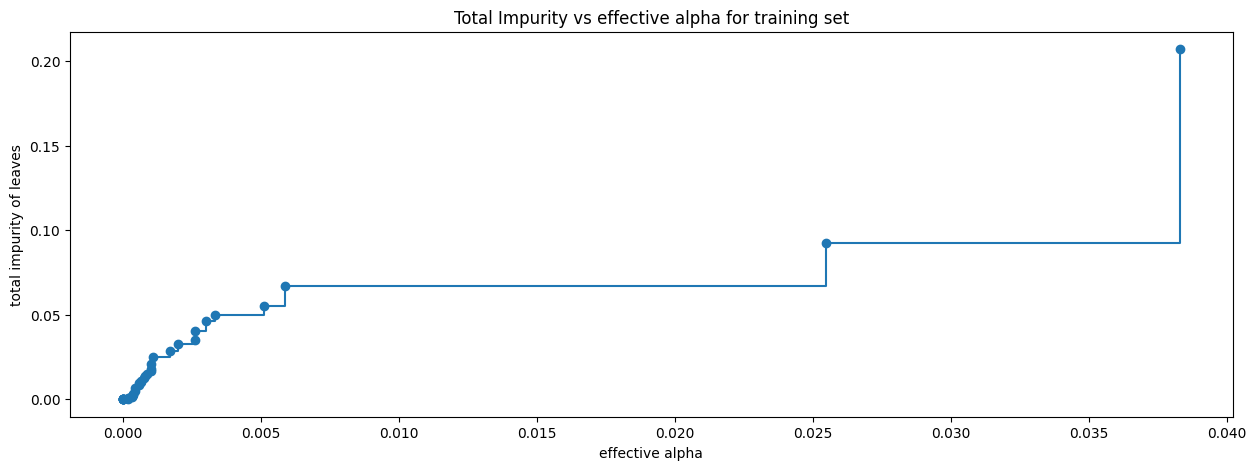

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29294838285268826


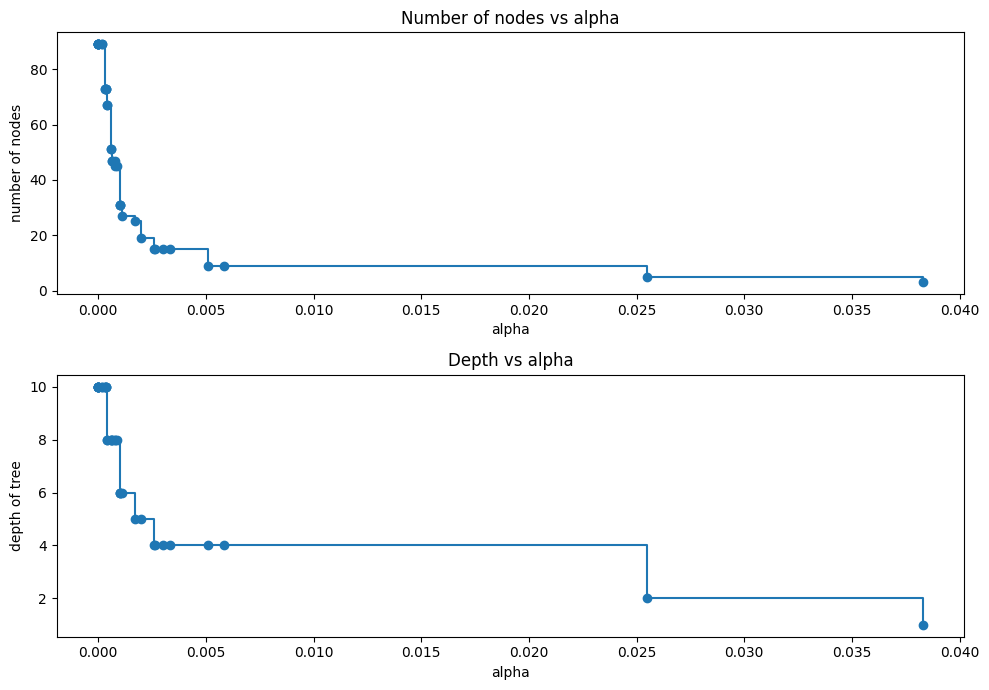

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

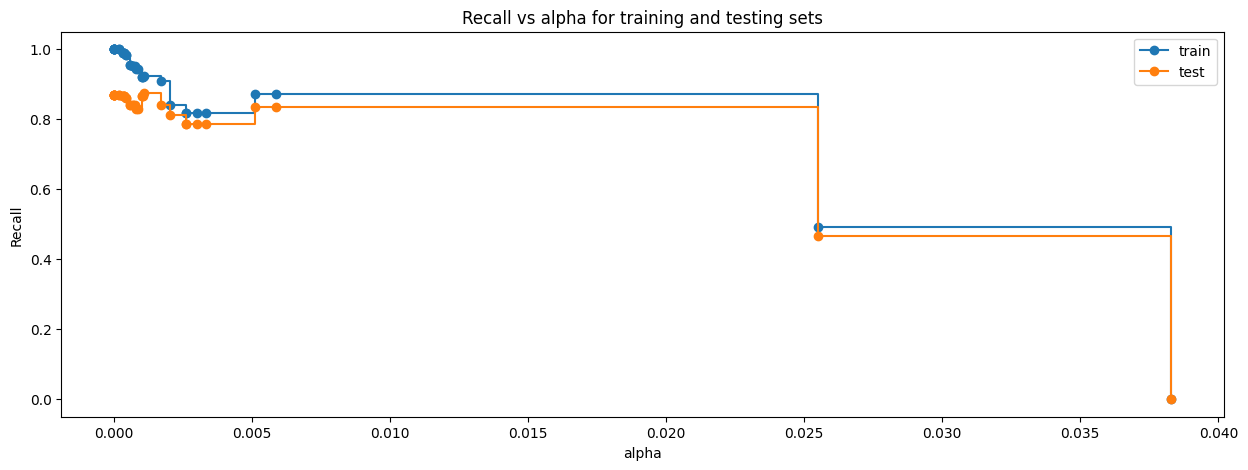

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0010975272432859422, random_state=1)


In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.989333,0.923345,0.963636,0.94306


# **Recall is training lower in the post-pruning model than the pre-pruning model **

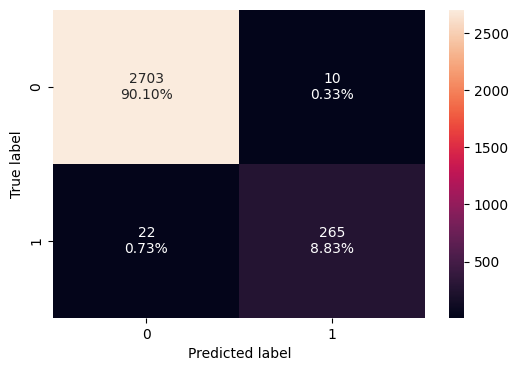

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.9825,0.875648,0.938889,0.906166


# **Test model also showing poor recall vs train and vs pre-pruning model**

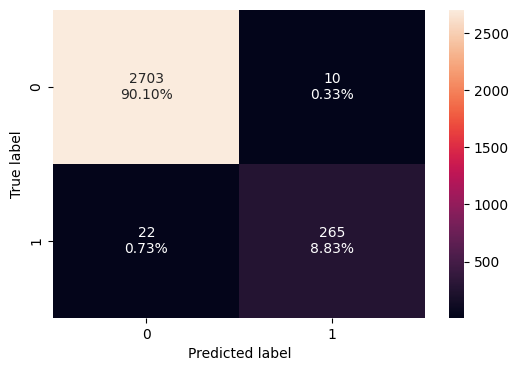

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

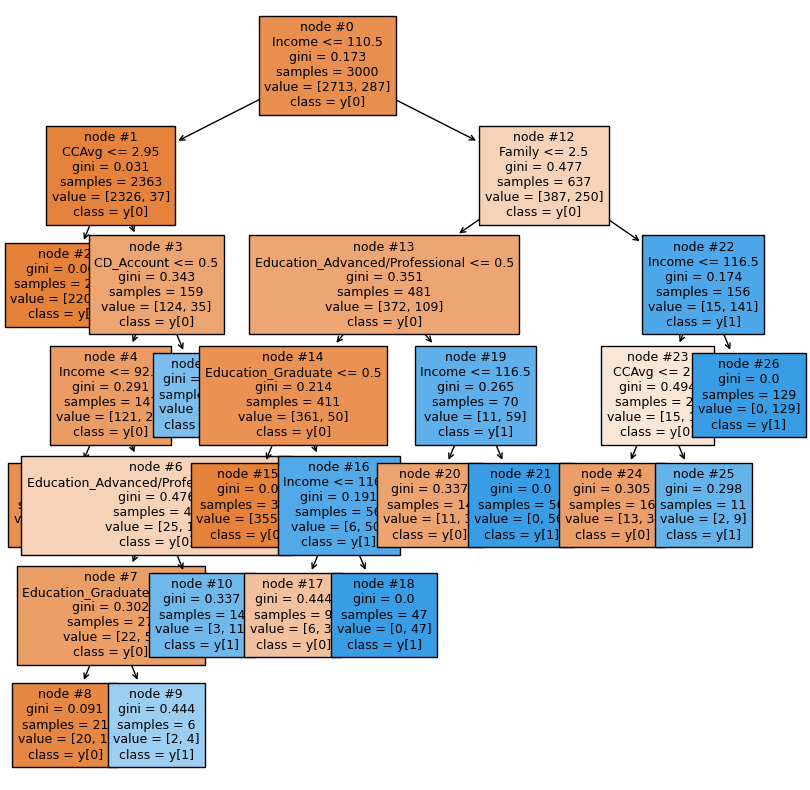

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2202.00, 2.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [96.00, 10.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education_Advanced/Professional <= 0.50
|   |   |   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |   |   |--- weights: [20.00, 1.00] class: 0
|   |   |   |   |   |--- Education_Graduate >  0.50
|   |   |   |   |   |   |--- weights: [2.00, 4.00] class: 1
|   |   |   |   |--- Education_Advanced/Professional >  0.50
|   |   |   |   |   |--- weights: [3.00, 11.00] class: 1
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 9.00] class: 1
|--- Income >  110.50
|   |--- Family <= 2.50
|   |   |--- Education_Advanced/Professional <= 0.50
|   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |--- weights: [355.00, 0.00] class: 0
|   |   |   |--- Education_Graduate >  0.50
|   |   

In [ ]:
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                      Imp
Income                           0.390240
Family                           0.231710
Education_Graduate               0.173047
Education_Advanced/Professional  0.147687
CCAvg                            0.041686
CD_Account                       0.015629
Age                              0.000000
ZIPCode_92                       0.000000
ZIPCode_95                       0.000000
ZIPCode_94                       0.000000
ZIPCode_93                       0.000000
CreditCard                       0.000000
ZIPCode_91                       0.000000
Online                           0.000000
Securities_Account               0.000000
Mortgage                         0.000000
ZIPCode_96                       0.000000


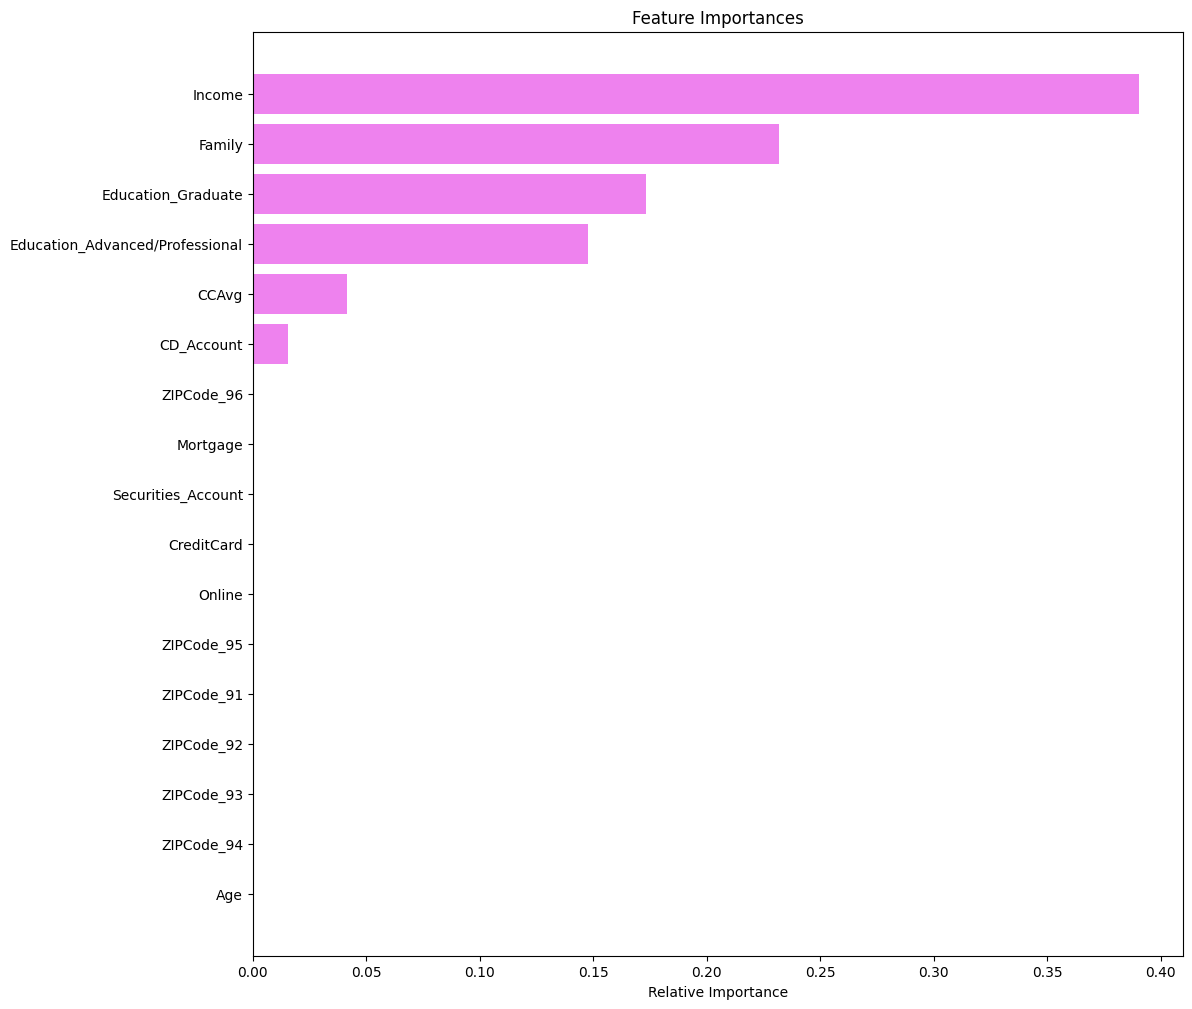

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## **Number of important features increases to six compared to the four in the pre-pruned model**

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.804333,0.989333
Recall,1.0,1.000000,0.923345
Precision,1.0,0.328375,0.963636
F1,1.0,0.494401,0.943060


In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.977500,0.785000,0.982500
Recall,0.849741,0.989637,0.875648
Precision,0.911111,0.308562,0.938889
F1,0.879357,0.470443,0.906166


# **The grid search pre-pruned model is the best model showing 100% recall in train and nearly 99% recall in test. While this model has a lower accuracy and precision scores vs the other models, the maximizing recall criteria makes the grid search model the best for implementation**

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

### ***Recommendations: ***
1. Utilize the grid search model which maximizes the recall (true positives) of those who purchase a Personal Loan.
***Consumer Profile of those interested in Personal Loans***
- An 'Income' level greater than 92.5k.
- A 'Family' size larger than 2.5 (possibly indicating a need for larger financial support or investment).
- An 'Income' level not too high (≤$110.5k), which might indicate a certain threshold where they might not require personal loans.
- Higher education level, especially at the advanced or professional level.


In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/colabnotebooks/personal_loan/AIML_ML_Project_full_code_notebook_DavidBingham.ipynb' --output '/content/drive/MyDrive/colabnotebooks/personal_loan/PersonalLoan_FullCode_DavidBingham.html'

[NbConvertApp] Converting notebook /content/drive/MyDrive/colabnotebooks/personal_loan/AIML_ML_Project_full_code_notebook_DavidBingham.ipynb to html
[NbConvertApp] Writing 3608115 bytes to /content/drive/MyDrive/colabnotebooks/personal_loan/PersonalLoan_FullCode_DavidBingham.html


___